In [29]:
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

# Configure Neo4j connection settings
neo4j_url = "neo4j+ssc://34.126.85.60:7687"
neo4j_user = "neo4j"
neo4j_password = "neo4j123"
neo4j_db = "neo4j"

# Create a Neo4j driver and GDS driver
driver = GraphDatabase.driver(neo4j_url, auth=(neo4j_user, neo4j_password),database=neo4j_db)
gds = GraphDataScience(neo4j_url,auth=(neo4j_user,neo4j_password),database=neo4j_db)

print(f"GDS Version: {gds.version()}")

GDS Versoin: 2.3.3


# Data Ingestion from CSVs

In [2]:
data_location = 'https://raw.githubusercontent.com/zhongjie526/neo4j_data_catalog/master/data/'

gds.run_cypher("MATCH (n) DETACH DELETE n;")
gds.run_cypher("CREATE CONSTRAINT imp_uniq_tbl_name IF NOT EXISTS FOR (n: Table) REQUIRE (n.name) IS UNIQUE;")
gds.run_cypher("CREATE CONSTRAINT imp_uniq_ds_name IF NOT EXISTS FOR (n: Datasource) REQUIRE (n.name) IS UNIQUE;")
gds.run_cypher("CREATE CONSTRAINT imp_uniq_col_name IF NOT EXISTS FOR (n: Column) REQUIRE (n.name) IS UNIQUE;")
gds.run_cypher("CREATE CONSTRAINT imp_uniq_team_name IF NOT EXISTS FOR (n: Team) REQUIRE (n.name) IS UNIQUE;")
gds.run_cypher("CREATE CONSTRAINT imp_uniq_user_name IF NOT EXISTS FOR (n: User) REQUIRE (n.name) IS UNIQUE;")

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row 
WITH row WHERE row.name is not null
MERGE (n: Table { name: replace(row.name, '"', '') }) 
SET n._uid = row._uid
""",params={'path':data_location+'table_n0.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row 
WITH row WHERE NOT row.`name` IS NULL
MERGE (n: Datasource { name: replace(row.name, '"', '') }) 
SET n._uid = row._uid;
""",params={'path':data_location+'datasource_n1.csv'})


gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
WITH row WHERE NOT row.`name` IS NULL
MERGE (n: `Column` { `name`: replace(row.name, '"', '')})
SET n.`_uid` = row.`_uid`;
""",params={'path':data_location+'column_n2.csv'})


gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
with row WHERE NOT row.`name` IS NULL
MERGE (n: `Team` { `name`: replace(row.name, '"', '') })
SET n.`_uid` = row.`_uid`;
""",params={'path':data_location+'team_n3.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
with row WHERE NOT row.`name` IS NULL
MERGE (n: `User` { `name`: replace(row.name, '"', '')})
SET n.`_uid` = row.`_uid`;
""",params={'path':data_location+'user_n4.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
with row WHERE NOT row.`name` IS NULL
MERGE (n: `Table` { `name`: replace(row.name, '"', '')})
SET n.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_n5.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '')  })
MATCH (target: `Column` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `HAS_COLUMN`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_has_column_column_n1.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '') })
MATCH (target: `Team` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `OWNED_BY`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_owned_by_team_n2.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Team` { `name`: replace(row._from_name, '"', '') })
MATCH (target: `User` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `HAS_USER`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'team_has_user_user_n3.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '') })
MATCH (target: `Datasource` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `FROM_SOURCE`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_from_source_datasource_n4.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '') })
MATCH (target: `Column` { `name`: replace(row._to_name, '"', '')})
MERGE (source)-[r: `HAS_COLUMN`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_has_column_column_n5.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '') })
MATCH (target: `Team` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `OWNED_BY`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_owned_by_team_n6.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `Table` { `name`: replace(row._from_name, '"', '')  })
MATCH (target: `Table` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `DERIVED_FROM`]->(target)
SET r.`_uid` = row.`_uid`;
""",params={'path':data_location+'table_derived_from_table_n7.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `User` { `name`: replace(row._from_name, '"', '')  })
MATCH (target: `Table` { `name`: replace(row._to_name, '"', '') })
MERGE (source)-[r: `HAS_ROLE`]->(target)
SET r.`role` = row.`role`;
""",params={'path':data_location+'user_has_role_table_n8.csv'})

gds.run_cypher("""
LOAD CSV with HEADERS FROM $path as row
MATCH (source: `User` { `name`: replace(row._from_name, '"', '')  })
MATCH (target: `Table` { `name`: replace(row._to_name, '"', '')})
MERGE (source)-[r: `HAS_ROLE`]->(target)
SET r.`role` = row.`role`;
""",params={'path':data_location+'user_has_role_table_n9.csv'})


""


<img src="data_model.png" alt="Data Model" width="600"/>

`This is the graph data model we ended up building, it is simple but sufficient for our exploratory purposese.`

In [61]:
%pip install matplotlib
%pip install networkx

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Check Data Lineage

#### In the example before, we start with a random column name 'contract_end_date' and try to examine the data lineage of it using a simple Cypher query and visualize the output using the networkx and matplotlib librabries.

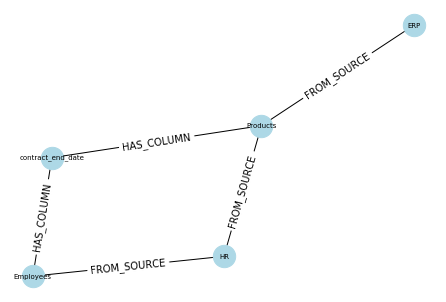

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


plt.clf()
with driver.session() as session:
    result = session.run("match (c:Column {name:'contract_end_date'})-[r1:HAS_COLUMN]-(t:Table)-[r2:FROM_SOURCE]-(s:Datasource) return c,r1,t,r2,s")

    # Create a Network object
    G = nx.Graph()

    # Add the node to the network
    for record in result:
        node = record["c"]
        G.add_node(node.id, label=node["name"], color="lightblue")
        node = record["t"]
        G.add_node(node.id, label=node["name"], color="lightblue")
        node = record["s"]
        G.add_node(node.id, label=node["name"], color="lightblue")
        rel = record["r1"]
        G.add_edge(rel.start_node.id, rel.end_node.id,label=rel.type)
        rel = record["r2"]
        G.add_edge(rel.start_node.id, rel.end_node.id,label=rel.type)


# Visualize the network
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, "label")
edge_labels = nx.get_edge_attributes(G, "label")

nx.draw(G, pos, labels = labels,with_labels=True, node_color="lightblue", node_size=500, font_size=7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

``As shown in the graph above, column "contract_end_date" may come from both Table "Products" and "Emplyees" which are data sources ERP and HR respectively``

## Identifying Orphaned Data

In [26]:
with driver.session() as session:
    result = session.run("""
    MATCH (n:Table)
    WHERE NOT EXISTS(()-->(n))
    RETURN n
    """)
    
    for record in result:
        node= record["n"]
        print("Table name: "+node["name"]+" with node id("+str(node.id)+")")

Table name: Orphaned table with node id(122)


## Finding Critical Data Assets by Degree Centrality

**Degree Centrality measures the number of connections or relationships a node has in a graph. In the context of data quality analysis, you can use Degree Centrality to identify metadata elements (nodes) that have a high number of relationships, indicating their significance or importance in the data ecosystem. Nodes with high Degree Centrality may represent critical tables, columns, or data entities that require careful attention and quality assessment.**

In [11]:
gds.run_cypher("""

CALL gds.graph.drop('myGraph',false) YIELD graphName;
""")


gds.run_cypher("""
CALL gds.graph.project(
  'myGraph',
  ['Table','User'],
  {
    HAS_ROLE: {
      orientation: 'REVERSE'
    }
  }
)
""")

gds.run_cypher("""
CALL gds.degree.stream('myGraph')
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS owners
ORDER BY owners DESC, name DESC
LIMIT 5
""")


,name,owners
0,Orders_Summary,19.0
1,Customer_Summary,19.0
2,Products,13.0
3,Customers,12.0
4,Invoices,9.0


## Identifying Duplicate Data

### In the following example, we create an "almost" duplicate of a table by making them sharing 80% of the columns. Then we run Jaccard similarity score between all the tables based on their columns and return the results sorted descendingly by the Jaccard score.

In [123]:
gds.run_cypher("""
match (t1:Table {name:"Products_Duplicate"}) detach delete t1
""")

gds.run_cypher("""
match (t:Table {name:"Products"})--(c:Column)  with c
merge (t1:Table {name:"Products_Duplicate"})
with t1,c, rand() as r
where r>0.2
merge (t1)-[:HAS_COLUMN]->(c)
""")

gds.run_cypher("""
MATCH (n1:Table)-[*..1]-(common:Column)
WITH n1,COLLECT(DISTINCT common) AS set1
MATCH (n2:Table)-[*..1]-(common:Column)
where id(n1)<id(n2)
WITH n1, set1, n2, COLLECT(DISTINCT common) AS set2
WITH n1, set1, n2, apoc.coll.intersection(set1, set2) AS intersection,
     apoc.coll.union(set1, set2) AS union
with n1, n2, size(intersection)*1.0 / size(union) AS similarity order by similarity desc
where similarity>0.3
return n1.name as table1,n2.name as table2,similarity
""")

,table1,table2,similarity
0,Products_Duplicate,Products,0.866667
1,Products,Customers,0.400000
2,Customer_Summary,Departments,0.333333


`Surpringly, our mocked duplicate table ended up first on the rank!`